## Observations and Insights
#### Add your analysis here
---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
combined_mouse_data= pd.merge(study_results,mouse_metadata, on="Mouse ID", how="left")
# Display the data table for preview
combined_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Check the number of mice.
combined_mouse_data['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice= combined_mouse_data.loc[combined_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data= combined_mouse_data[combined_mouse_data['Mouse ID'].isin(duplicate_mice)==True]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data= combined_mouse_data[combined_mouse_data['Mouse ID'].isin(duplicate_mice)==False]

In [6]:
# Check the number of mice in the clean DataFrame.
cleaned_mouse_data['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
groupedby_drug= cleaned_mouse_data.groupby('Drug Regimen')

# Use this straighforward method, create multiple series and put them all in a dataframe at the end.
summary_mean= groupedby_drug['Tumor Volume (mm3)'].mean()
summary_mean

summary_median= groupedby_drug['Tumor Volume (mm3)'].median()
summary_median

summary_var= groupedby_drug['Tumor Volume (mm3)'].var()
summary_var

summary_std= groupedby_drug['Tumor Volume (mm3)'].std()
summary_std

summary_sem= groupedby_drug['Tumor Volume (mm3)'].sem()
summary_sem

summary_statistics= pd.DataFrame(summary_mean)
summary_statistics= summary_statistics.rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume'})

summary_statistics['Median Tumor Volume']= summary_median
summary_statistics['Tumor Volume Variance']= summary_var
summary_statistics['Tumor Volume Std. Dev']= summary_std
summary_statistics['Tumor Volume Std. Err.']= summary_sem

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use method to produce everything with a single groupby function
grouped_sum_stats= groupedby_drug.agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
grouped_sum_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

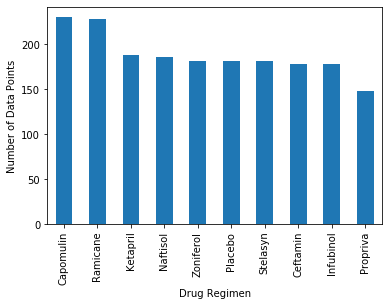

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
treatment_group= cleaned_mouse_data.groupby('Drug Regimen')
treatment_count= treatment_group['Mouse ID'].count()

treatment_df= pd.DataFrame(treatment_count)
treatment_df= treatment_df.sort_values(['Mouse ID'], ascending= False)

treatment_chart= treatment_df.plot(kind='bar', legend= False)
treatment_chart.set_xlabel('Drug Regimen')
treatment_chart.set_ylabel('Number of Data Points')

plt.show()

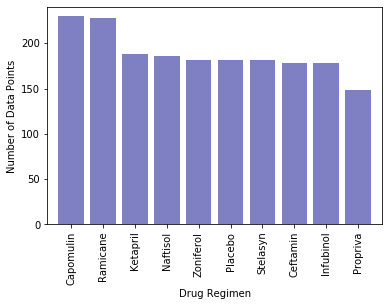

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(treatment_df))
tick_locations = [value for value in x_axis]
tick_labels= ['Capomulin','Ramicane','Ketapril', 'Naftisol', 'Zoniferol', 'Placebo', 'Stelasyn', 'Ceftamin', 'Infubinol', 'Propriva']

plt.bar(x_axis, treatment_df['Mouse ID'], color='darkblue', alpha=.5, align='center')
plt.xticks(tick_locations, tick_labels, rotation= 'vertical')

plt.xlim(-.75, len(x_axis) -.25)
plt.ylim(0, max(treatment_df["Mouse ID"])+10)

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')

plt.show()

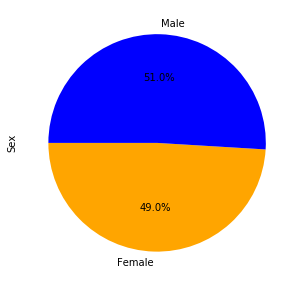

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
groupby_sex= cleaned_mouse_data.groupby('Sex')
sex_count= groupby_sex['Mouse ID'].count()

pandas_pie= sex_count.plot(kind='pie', figsize=(5, 5), colors= ['orange', 'blue'], autopct="%1.1f%%", startangle=180)
pandas_pie.set_ylabel('Sex')
plt.show()

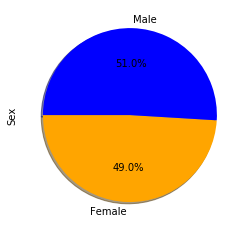

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels= ['Female', 'Male']
sizes= [922, 958]
colors= ['orange', 'blue']

plt.pie(sizes, labels=labels, colors=colors, autopct= "%1.1f%%", shadow=True, startangle= 180)
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across each of the treatment regimens: 
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint= cleaned_mouse_data.groupby('Mouse ID').max()['Timepoint']
timepoint_df= pd.DataFrame(last_timepoint)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint_merged= pd.merge(last_timepoint, cleaned_mouse_data, on=('Mouse ID', 'Timepoint'), how='left')
timepoint_merged.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
5,a401,45,66.794156,4,Zoniferol,Female,8,25
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
8,a457,10,49.783419,0,Ketapril,Female,11,30
9,a492,45,60.122011,1,Stelasyn,Male,20,25


In [30]:
# Put 4 treatment names into a list for use with a for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create a empty list to fill with tumor vol data (for plotting) (hint: each element of the list will be series)
tumor_vol_list = []
# For each treatment in the list, calculate the IQR and quantitatively 
# determine if there are any potential outliers. 
for drug in treatment_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_list.append(timepoint_merged.loc[timepoint_merged['Drug Regimen']== drug, 'Tumor Volume (mm3)'])
    # add subset to tumor volume data list
    
    subset = pd.DataFrame(tumor_vol_list)
   
    # Determine outliers using upper and lower bounds
    quartiles = subset.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    #upper_bound = upperq + (1.5*iqr)
subset

,Drug Regimen
0,19 38.982878 24 38.939633 61 30.48...
1,6 38.407618 7 43.047543 10 38.81...
2,0 67.973419 1 65.525743 11 57.03...
3,3 62.999356 21 45.000000 22 56.05...


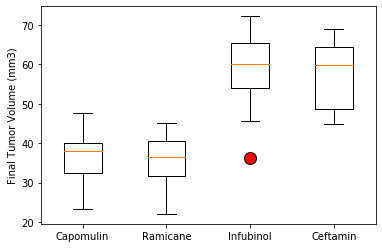

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

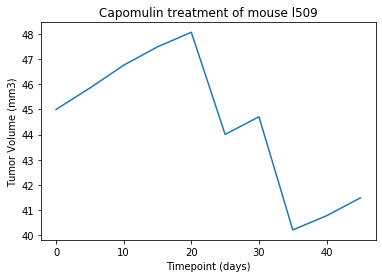

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


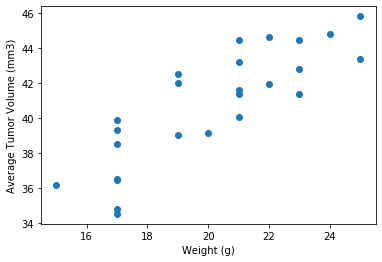

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


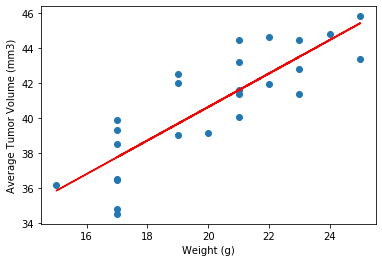

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
